# 이미지 데이터의 전처리  
- https://roadbook.co.kr/242 의 이미지 데이터(ants, bees)를 활용  

## 1. 데이터 이해
- 이미지 데이터 전처리의 목표는 이미지에 포함되어 있는 피사체를 식별하는 것 그리고 식별 정확도를 높이는 것임
- 전자의 경우에는 지도학습 알고리즘을 통해 분류 모델을 구현할 수 있음
- 후자의 경우에는 비지도학습의 PCA를 사용해서 구현할 수 있음

### 데이터 읽기와 확인

(261, 280, 3)


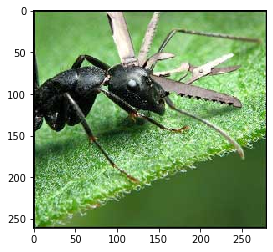

In [3]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./ants/swiss-army-ant.jpg')
print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 실행 결과를 통해 이미지의 크기는 280x261, 컬러 채널은 3인 것을 알 수 있음
- print(img)를 통해 이미지의 배열에 저장되어 있는 픽셀값 확인이 가능함

In [8]:
print(len(img))
print(len(img[0]))
print(len(img[0][0]))

261
280
3


- 위의 결과를 통해 이미지의 픽셀 값 접근은 세로 -> 가로 -> 컬러 채널임을 알 수 있음

### 픽셀값 확인(컬러 이미지)

In [9]:
import pandas as pd

b, g, r = cv2.split(img)

b_df = pd.DataFrame(b) # 앞서 정의한 b, g, r을 통해 접근이 가능함
print(b_df.shape)
b_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,60,28,12,0,0,0,1,0,0,0,...,2,0,0,6,0,0,0,4,13,17
1,28,16,21,0,0,0,0,0,0,0,...,1,0,0,0,0,2,12,15,19,4
2,18,24,92,81,83,69,86,89,89,85,...,116,113,119,115,107,120,125,127,99,11
3,0,0,82,77,74,60,75,78,72,71,...,109,108,107,97,96,110,116,130,92,0
4,0,0,84,75,66,55,67,69,70,68,...,96,94,93,87,90,102,109,135,105,0


- 위의 결과를 통해 B(Blue)의 픽셀 값을 확인할 수 있음
- b, g, r 순으로 정의한 값을 대입하여 파랑색 뿐만 아니라 초록, 빨강색에 대한 픽셀값을 받아올 수 있음

### 픽셀값 확인(그레이스케일 이미지)
- 컬러 이미지와 다르게 휘도(밝기의 정도)만으로 표현하는 그레이스케일 이미지도 있음
- 컬러 이미지(RGB)에는 R, G, B 각각에 대해서 0~255의 픽셀값이 배열에 저장되어 있음
- 반면, 그레이스케일 이미지에는 휘도값에 대해서만 0~255의 픽셀값이 배열에 들어가 있음

(261, 280)


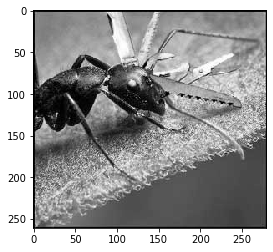

In [10]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
plt.imshow(gray_img, cmap='gray')
plt.show()

- cvtColor()를 통해 RGB(3)을 GrayScale(1)로 변환하였음
- 앞서 진행한 것과 같이 print()를 통해 세로 -> 가로 -> 채널 순으로 접근이 가능함

In [11]:
gr_df = pd.DataFrame(gray_img)
print(gr_df.shape)
gr_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,19,6,8,3,8,6,9,3,5,5,...,1,1,2,13,4,4,2,2,2,3
1,6,4,30,14,21,11,12,6,12,12,...,10,9,6,12,9,18,24,22,17,0
2,14,33,127,131,138,122,130,130,130,129,...,146,145,153,150,144,155,157,154,117,27
3,3,16,132,143,145,129,135,135,129,129,...,152,152,153,145,144,158,159,167,122,6
4,6,22,139,146,144,131,133,131,134,134,...,144,144,143,138,141,153,155,176,139,14


- 결과를 통해 휘도의 픽셀 값을 확인할 수 있음

### 픽셀값 확인(이진화 이미지)
- 그레이스케일 이미지보다 정보를 더 줄여서 특징량을 돋보이게 한 것이 이진화(Binarization) 이미지임
- 이진화 이미지는 픽셀값이 경계값보다 크면 흰색(255)을 값으로 주고, 경계값보다 작으면 검정(0)을 값으로 주어서 흑백 이미지로 변환함

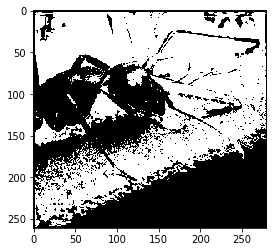

In [12]:
ret, bin_img = cv2.threshold(gray_img, 128, 255, cv2.THRESH_BINARY)
plt.imshow(bin_img, cmap='gray')
plt.show()

In [13]:
print(bin_img)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [14]:
bin_df = pd.DataFrame(bin_img)
print(bin_df.shape)
bin_df.head()

(261, 280)


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,255,255,0,255,255,255,255,...,255,255,255,255,255,255,255,255,0,0
3,0,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,0,0
4,0,0,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


## 2. 머신러닝을 위한 데이터 준비
- 이미지에 대해서만 전처리를 진행하였으므로, 추가적으로 라벨링을 진행해야함  

### 데이터 셋 작성

In [15]:
import os
import cv2
import numpy as np

dirs = ['ants', 'bees']
pixels = []
labels = []

for i, d in enumerate(dirs):
    files = os.listdir('./' + d)
    
    for f in files:
        img = cv2.imread('./' + d + '/' + f, 0)
        img = cv2.resize(img, (128, 128))
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        
        labels.append(i)

In [17]:
import pandas as pd

pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df/255

labels_df = pd.DataFrame(labels)
labels_df = labels_df.rename(columns={0: 'label'})

img_set = pd.concat([pixels_df, labels_df], axis=1)
img_set.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.549020,0.552941,0.545098,0.552941,0.545098,0.556863,0.556863,0.556863,0.552941,0.556863,...,0.294118,0.282353,0.286275,0.274510,0.294118,0.286275,0.286275,0.278431,0.360784,0
1,0.756863,0.831373,0.894118,0.815686,0.862745,0.866667,0.737255,0.772549,0.768627,0.219608,...,0.866667,0.890196,0.933333,0.905882,0.882353,0.921569,0.945098,0.858824,0.823529,0
2,0.521569,0.545098,0.549020,0.564706,0.572549,0.592157,0.588235,0.584314,0.580392,0.568627,...,0.537255,0.564706,0.674510,0.541176,0.482353,0.800000,0.894118,0.611765,0.654902,0
3,0.384314,0.392157,0.392157,0.396078,0.396078,0.392157,0.380392,0.388235,0.376471,0.392157,...,0.227451,0.156863,0.066667,0.023529,0.035294,0.047059,0.015686,0.007843,0.007843,0
4,0.290196,0.337255,0.380392,0.403922,0.407843,0.411765,0.411765,0.423529,0.450980,0.462745,...,0.239216,0.250980,0.262745,0.274510,0.286275,0.294118,0.337255,0.380392,0.427451,0


- 결과를 통해 라벨링이 된 것을 확인할 수 있음

### 모폴로지 변환
- 모폴로지변환(Morphological Transformations)은 이진화 이미지를 대상으로 압축(Erosion), 팽창(Dilation), 오프닝(Opening), 클로징(Closing) 등의 처리를 함
- 압축은 이미지에 대해 필터를 슬라이드하면서 필터의 픽셀값이 전부 1(흰색)일 경우메나 1을 출력하고 그렇지 않으면 0(검정)을 출력하는 처리임
- 팽창은 압축과 반대의 처리임

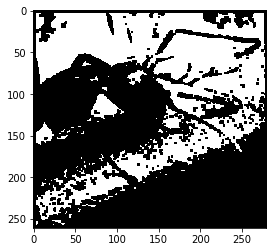

In [22]:
import matplotlib.pyplot as plt

img = cv2.imread('./ants/swiss-army-ant.jpg', 0)
# 2치화 이미지로 변환
ret, bin_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

# 이미지를 압축
kernel = np.ones((3,3), np.uint8)
img_el = cv2.erode(bin_img, kernel, iterations=1)
plt.imshow(img_el, cmap='gray')

- 3x3 크기의 필터를 생성하여 erode()를 통해 bin_img에 필터 kernel을 적용하여 압축함

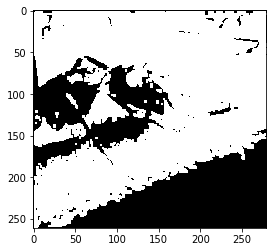

In [23]:
img_dl = cv2.dilate(bin_img, kernel, iterations=1)
plt.imshow(img_dl, cmap='gray')

- 3x3 크기의 필터를 생성하여 dilate()를 통해 bin_img에 필터 kernel을 적용하여 팽창함

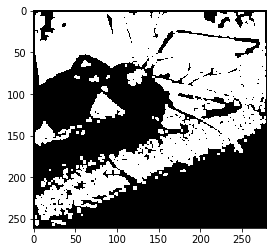

In [24]:
# 오프닝
img_op = cv2.morphologyEx(bin_img, cv2.MORPH_OPEN, kernel)
plt.imshow(img_op, cmap='gray')

- 오프닝은 압축 후에 팽창시키는 기능이며, 클로징은 팽창 후에 압축시키는 처리임
- 오프닝과 클로징은 노이즈 제거에 활용함

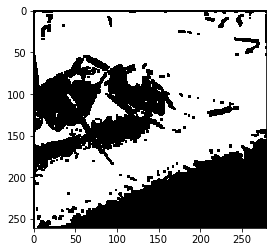

In [25]:
# 클로징
img_cl = cv2.morphologyEx(bin_img, cv2.MORPH_CLOSE, kernel)
plt.imshow(img_cl, cmap='gray')

### 히스토그램 작성
- 특징량으로 픽셀값을 그대로 사용하지 않고 요약하면 더 좋아지는 경우가 있음
- 요약하는 방법으로는 히스토그램이 있음

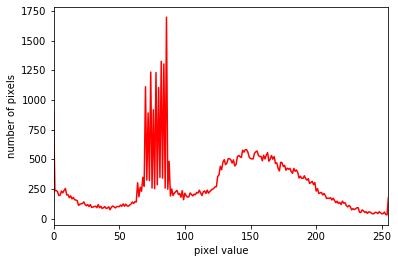

In [26]:
hist_gr, bins = np.histogram(img.ravel(), 256, [0,256])

plt.xlim(0, 255)
plt.plot(hist_gr, '-r')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.show()

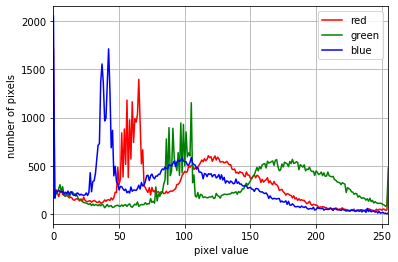

In [28]:
img = cv2.imread('./ants/swiss-army-ant.jpg')

b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
hist_r, bins = np.histogram(r.ravel(), 256, [0,256])
hist_g, bins = np.histogram(g.ravel(), 256, [0,256])
hist_b, bins = np.histogram(b.ravel(), 256, [0,256])

plt.xlim(0, 255)
plt.plot(hist_r, '-r', label='red')
plt.plot(hist_g, '-g', label='green')
plt.plot(hist_b, '-b', label='blue')
plt.xlabel('pixel value')
plt.ylabel('number of pixels')
plt.legend()
plt.grid()
plt.show()

### PCA에 의한 차원압축

In [29]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
pixels_pca = pca.fit_transform(pixels_df)

print(pca.n_components_)
print(pixels_pca.shape)

38
(157, 38)


In [30]:
img_set_pca = pd.concat([pd.DataFrame(pixels_pca), labels_df], axis=1)
img_set_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,label
0,8.445754,-1.709419,-0.421608,2.517579,-1.105137,-0.654897,-1.654017,-0.333829,0.008526,1.586907,...,0.373426,-0.858924,0.944997,0.213697,-0.455824,-0.430698,0.207925,0.410920,0.158837,0
1,32.108456,-5.450650,-10.087489,6.271582,-2.415914,-2.587277,0.354534,3.092743,0.774721,0.643372,...,-0.660856,0.663022,-0.967293,-0.582410,-0.297276,0.824820,-0.250012,1.007031,-0.425457,0
2,11.309408,1.498107,0.123485,-1.772761,1.833667,3.220819,2.798857,-2.075454,-2.973964,-0.623087,...,-0.297569,-0.840568,1.533243,-0.228937,-1.124986,0.227717,-0.553840,-0.309385,-1.359771,0
3,-10.880128,6.052154,-2.330367,-8.756066,0.663066,-5.794919,0.233182,1.925295,10.641944,-4.568486,...,-3.829385,1.222864,-0.727555,1.141051,0.891447,3.411304,0.350909,-3.287740,0.470517,0
4,-4.643106,11.203641,-15.243373,-2.337342,-2.382166,10.414246,1.409967,-5.909997,4.288054,-5.345626,...,1.121982,-0.808077,3.644130,-0.304018,3.366980,-0.364220,-0.266701,1.936094,2.070588,0


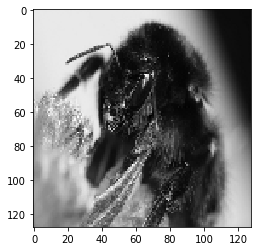

In [31]:
plt.imshow(np.array(pixels_df)[99].reshape(128, 128), cmap='gray')

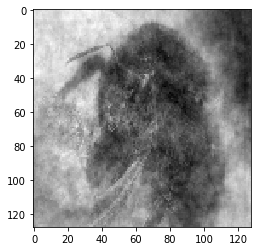

In [33]:
# 압축한 이미지 출력
pixels_low = pca.inverse_transform(pixels_pca)
plt.imshow(pixels_low[99].reshape(128, 128), cmap='gray')

### t-SNE에 의한 차원압축
- t-SNE도 PCA와 같이 비지도학습 알고리즘 중 하마로 데이터의 차원압축에 사용됨
- t-SNE는 데이터 사이의 거리를 확률분포로 표현함

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
pixels_tsne = tsne.fit_transform(pixels_df)

print(pixels_df.shape)
print(pixels_tsne.shape)

img_set_tsne = pd.concat([pd.DataFrame(pixels_tsne), labels_df], axis=1)
img_set_tsne.head()

(157, 16384)
(157, 2)


,0,1,label
0,-7.683067,36.190254,0
1,-32.198208,120.890091,0
2,-35.120552,54.488861,0
3,48.989918,-35.693790,0
4,-46.315674,-14.967627,0


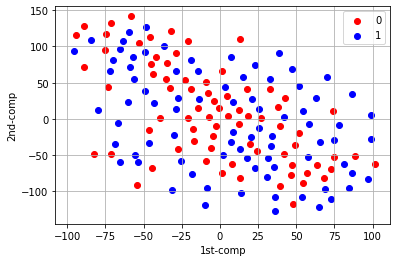

In [35]:
img_set_tsne_0 = img_set_tsne[img_set_tsne['label'] == 0]
img_set_tsne_0 = img_set_tsne_0.drop('label', axis=1)
plt.scatter(img_set_tsne_0[0], img_set_tsne_0[1], c='red', label=0)

img_set_tsne_1 = img_set_tsne[img_set_tsne['label'] == 1]
img_set_tsne_1 = img_set_tsne_1.drop('label', axis=1)
plt.scatter(img_set_tsne_1[0], img_set_tsne_1[1], c='blue', label=1)

plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.legend()
plt.grid()
plt.show()

## 3. 딥러닝을 위한 데이터 준비
- 머신러닝의 경우 사용하는 알고리즘의 파라미터를 정하는 방법에 따라 결과의 품질이 달라짐
- 딥러닝의 경우 네트워크 중간층의 가중치(특징량)을 자동으로 최적화를 수행
- 하지만, 도출된 결과에 대해 판단 및 검증이 어려움

### 데이터 셋 작성
-  그레이스케일 이미지를 CNN이 사용할 수 있는 데이터 셋의 형태로 전환

In [37]:
dirs = ['ants', 'bees']

pixels = []
labels = []

for i, d in enumerate(dirs):
    files = os.listdir('./' + d)
    
    for f in files:
        img = cv2.imread('./' + d + '/' + f, 0)
        img = cv2.resize(img, (128, 128))
        img = np.array(img).flatten().tolist()
        pixels.append(img)
        
        # 이미지의 레이블을 리스트에 보존 
        labels.append(i)

In [38]:
pixels = np.array(pixels)/255
pixels = pixels.reshape([-1, 128, 128, 1])
labels = np.array(labels)

print(pixels[0].shape)
print(labels[0])

(128, 128, 1)
0


In [39]:
from sklearn import model_selection

trainX, testX, trainY, testY = model_selection.train_test_split(pixels, labels, test_size=0.2)

print(len(trainY))
print(len(testY))

125
32


In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import keras.backend.tensorflow_backend as K
with K.tf.device('/cpu:0'):
    model = Sequential()
    # 1st Layer
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(128, 128, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    # 2nd Layer
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))
    # 전 결합층
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    # 출력층
    model.add(Dense(1, activation='sigmoid'))

    # 작성한 네트워크의 확인
    model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 16)      416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 26912)            

In [ ]:
# 학습조건의 설정　오차함수 = 2값의 교차 엔트로피, 최적화 방법 = 확률적경사하강법, 측정방법 = 모델의 정밀도
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 실행 
hist = model.fit(trainX, trainY, batch_size=64, verbose=1, 
                 epochs=20, validation_data=(testX, testY))

- 위와 같이 전처리한 데이터를 Keras를 활용하여 학습 수행(TF, Keras 버전 매칭 때문에 실행하지 않음)

### 이미지 증강
- 다양한 방법의 이미지 증강 기법이 있지만, 대표적으로 반전, 블러, 명도 조절이 있음

In [72]:
img = cv2.imread('./ants/swiss-army-ant.jpg', 0)

# 반전
x_img = cv2.flip(img, 0) # x축 기준
y_img = cv2.flip(img, 1) # y축 기준
xy_img = cv2.flip(img, -1) # xy축 기준

cv2.imwrite('x_img.jpg', x_img)
cv2.imwrite('y_img.jpg', y_img)
cv2.imwrite('xy_img.jpg', xy_img)

True

In [73]:
# 블러
blur_img = cv2.blur(img, (5,5))
gau_img = cv2.GaussianBlur(img, (5,5), 0)
med_img = cv2.medianBlur(img, 5)

cv2.imwrite('blur_img.jpg', blur_img)
cv2.imwrite('gau_img.jpg', gau_img)
cv2.imwrite('med_img.jpg', med_img)

True

In [74]:
# 명도
gamma = 1.5

lut = np.zeros((256,1), dtype = 'uint8')

for i in range(len(lut)):
    lut[i][0] = 255 * pow((float(i)/255), (1.0/gamma))

gamma_img = cv2.LUT(img, lut)

cv2.imwrite('gamma_img.jpg', gamma_img)

True